# Cycling Analysis with Extended Data

# Introduction

Cycling is an important exercise in our everyday lives. It's a great alternative to running and walking
and it's something that pretty much everyone can do. It's also a competitive sport that brings in millions
to enjoy the many benefits it has. Given it has an array of benefits for the casual or competitive cyclist,
we'll analyse a dataset with entries from cyclists from rides they've recorded.

With approximately 40 different entries of data recorded and around 180 recordings from cyclists, we are 
provided a dataset that we can break down and analyse with the intention of highlighting potential patterns 
and eventually using those comparisons to identify key relationships between data entries in the dataset.
With relationships identified we can build models with the intention of predicting data of interest. In 
particular, we'll start off with a metric such as calories burned. For weight gain, loss and control, calorie
counting is the key metric needed to be recorded and tracked. In theory, the more calories you burn, the more
energy you can consume, and depending on this weight will flucuate. For the common person trying to possibly 
lose weight, predicting calorie loss in a bike ride before the ride has even commenced could be extremely 
beneficial for tracking food intake and indentifying how much riding needs to be done to counteract certain meals.

In [67]:
# First import the 2 most important libraries for datasets, arrays, etc.
import pandas as pd
import numpy as np

In [68]:
# Read the dataset as a dataframe
df = pd.read_csv("extended_activities_with_ftp.csv")

In [69]:
# We'll check the shape of the dataset, checking all columns were imported
print("The dimesions of the batting dataset are: ", df.shape)

The dimesions of the batting dataset are:  (181, 42)


In [70]:
# check the dataset for any missing values to check its validity
miss_values = df.isnull().sum()
print(miss_values)

Activity Date                     0
Elapsed Time                      0
Distance                          0
Max Heart Rate                    0
Relative Effort                   0
Athlete Weight                  111
Bike Weight                      19
Moving Time                       0
Max Speed                         0
Average Speed                     0
Elevation Gain                    1
Elevation Loss                    6
Elevation Low                     6
Elevation High                    6
Max Grade                         0
Average Grade                     0
Max Cadence                       0
Average Cadence                   0
Average Heart Rate                0
Average Watts                     0
Calories                          0
Average Temperature               6
Total Work                        1
Perceived Exertion              180
Weighted Average Power            0
Power Count                       0
Prefer Perceived Exertion       179
Perceived Relative Effort   

In [71]:
# Since we have some missing values, we'll fill them with 0 (null)
# It may lead to slight inaccuracies but in some cases we can assume it would've been zero regardless
df.fillna(0, inplace = True)

In [72]:
# check the data types of each of the columns for clarity purposes
print(df.dtypes)

Activity Date                    object
Elapsed Time                      int64
Distance                        float64
Max Heart Rate                    int64
Relative Effort                   int64
Athlete Weight                  float64
Bike Weight                     float64
Moving Time                       int64
Max Speed                       float64
Average Speed                   float64
Elevation Gain                  float64
Elevation Loss                  float64
Elevation Low                   float64
Elevation High                  float64
Max Grade                       float64
Average Grade                   float64
Max Cadence                       int64
Average Cadence                 float64
Average Heart Rate              float64
Average Watts                   float64
Calories                        float64
Average Temperature             float64
Total Work                      float64
Perceived Exertion              float64
Weighted Average Power            int64


# Data Analysis

To begin, we'll incorporate some simple data analysis. Patterns within the data can sometimes be
the most important thing we analyse. The measure of spread is the main identifier of patterns within
certain datasets. If data tends to have extreme outliers it can be costly when attempting to predict 
certain things. For example, a data that has a strong centre spread, meaning all data is distributed
mostly evenly along the axis, it gives stronger indication that we can safely assume where most data
entries lie within that set of data. If we know most of the data lies within the centre of the spread,
we can assume any knew data entry will also most likely fall within the centre of the spread as well. 

In [77]:
# since we want to summarise the data, import the stats library
from scipy import stats

# to summarise import the appropriate libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
from IPython.display import display

In [79]:
# This is to present the data in a more attractive way

In [80]:
display(df)

,Activity Date,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,...,60 Day Maximum Power 30s,60 Day Maximum Power 1.0min,60 Day Maximum Power 5.0min,60 Day Maximum Power 10.0min,60 Day Maximum Power 20.0min,60 Day Maximum Power 30.0min,60 Day Maximum Power 1.0 hr,60 Day Maximum Power 1.5 hr,60 Day Maximum Power 2.0 hr,FTP
0,12/13/2019 1:46,3859,22.97,139,11,84.0,0.0,3811,10.200000,5.989000,...,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0,222.5
1,12/20/2019 23:05,4852,29.65,133,12,84.0,0.0,4693,14.100000,6.343000,...,342.1,221.2,162.2,136.3,122.1,120.3,115.6,0.0,0.0,222.6
2,12/21/2019 23:25,5817,32.38,139,19,84.0,0.0,5601,12.000000,5.800000,...,342.1,221.2,162.2,136.3,127.5,125.5,115.6,104.7,0.0,222.6
3,12/24/2019 1:19,3851,21.68,140,11,84.0,0.0,3816,11.400000,5.697000,...,342.1,262.0,162.2,146.7,139.7,134.0,115.6,104.7,0.0,222.6
4,12/26/2019 0:09,5843,32.36,131,14,80.0,0.0,5740,10.900000,5.657000,...,342.1,262.0,162.2,146.7,139.7,134.0,115.6,104.7,0.0,222.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,3/4/2023 22:55,1986,20.48,177,70,0.0,8.0,1986,13.873828,10.312165,...,333.6,293.3,275.2,269.9,266.1,237.4,193.7,184.8,174.6,252.7
177,3/6/2023 3:04,3469,25.05,150,11,0.0,8.0,3364,16.763998,7.448936,...,333.6,291.0,253.3,247.1,240.6,237.4,193.7,184.8,174.6,252.7
178,3/11/2023 0:00,14351,107.22,150,49,0.0,8.0,13685,13.921875,7.834877,...,333.6,291.0,253.3,247.1,240.6,237.4,193.7,184.8,174.6,252.7
179,5/4/2023 4:18,7496,55.62,137,24,0.0,8.0,7191,16.855999,7.734912,...,291.5,260.2,215.3,201.9,188.0,181.7,169.4,167.0,166.9,252.7


The first step is to isolate some columns that we want to focus on. For this we'll use the built-in 
describe function courteous of the numpy package. This function produces the following statsitics:

- count (total amount)
- mean (average)
- standard deviation (measure of deviation from the average)
- minumum value
- 25% quartile median
- the median (50% quartile)
- 75% quartile median
- maximum value

In particular, it's valuable to observe the differences in the mean and the median since they
are both measures of centre of spread. If they're close together we often assume its a more
symmetric spread of the data, and if there's a big difference then we can either assume they're
positively or negatively skewed datasets which in turn may affect the strength of any predictive
model. 

In [97]:
df_elapsed_time = df['Elapsed Time']
df_distance = df['Distance']
df_max_HR = df['Max Heart Rate']
df_effort = df['Relative Effort']
df_max_speed = df['Max Speed']
df_avg_speed = df['Average Speed']
df_ftp = df['FTP']

In [98]:
np.round(df_elapsed_time.describe(), 2)

count      181.00
mean      7419.68
std       3703.59
min       1626.00
25%       5635.00
50%       6757.00
75%       7998.00
max      22391.00
Name: Elapsed Time, dtype: float64

In [99]:
np.round(df_distance.describe(), 2)

count    181.00
mean      54.42
std       28.13
min       10.96
25%       38.11
50%       50.89
75%       60.97
max      180.08
Name: Distance, dtype: float64

In [100]:
np.round(df_max_HR.describe(), 2)

count    181.00
mean     145.15
std       13.88
min      118.00
25%      137.00
50%      143.00
75%      150.00
max      209.00
Name: Max Heart Rate, dtype: float64

In [101]:
np.round(df_effort.describe(), 2)

count    181.00
mean      34.38
std       28.14
min        5.00
25%       18.00
50%       27.00
75%       40.00
max      232.00
Name: Relative Effort, dtype: float64

In [102]:
np.round(df_max_speed.describe(), 2)

count    181.00
mean      12.23
std        2.24
min        6.28
25%       10.70
50%       11.94
75%       13.20
max       24.76
Name: Max Speed, dtype: float64

In [103]:
np.round(df_avg_speed.describe(), 2)

count    181.00
mean       7.61
std        0.84
min        4.50
25%        7.19
50%        7.54
75%        7.98
max       10.65
Name: Average Speed, dtype: float64

In [104]:
np.round(df_ftp.describe(), 2)

count    181.00
mean     237.28
std       13.33
min      222.50
25%      223.80
50%      245.30
75%      250.50
max      252.70
Name: FTP, dtype: float64

It's one thing to see the figures of these data entries, it's another thing to visualise them.
Using graphs we can visually see spread of data and identify certain things such as outliers that
will further assist us in identifying the strength of our models. 

Text(0.5, 1.0, 'Box Plot for Elapsed Time Cycling')

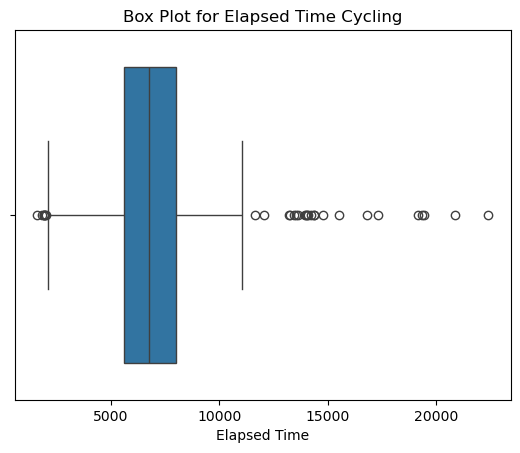

In [105]:
sns.boxplot(x = df_elapsed_time, data = df)
plt.title("Box Plot for Elapsed Time Cycling")

Text(0.5, 1.0, 'Box Plot for Distance Covered Cycling')

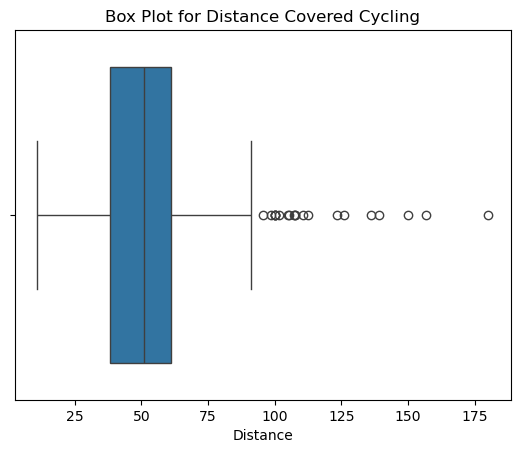

In [106]:
sns.boxplot(x = df_distance, data = df)
plt.title("Box Plot for Distance Covered Cycling")

Text(0.5, 1.0, 'Box Plot for Max Heart Rate during Cycling')

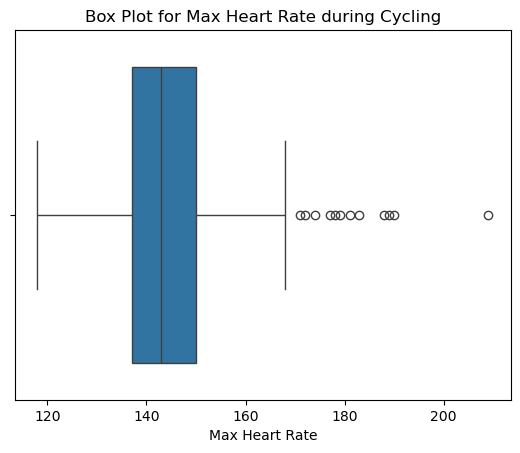

In [107]:
sns.boxplot(x = df_max_HR, data = df)
plt.title("Box Plot for Max Heart Rate during Cycling")

Text(0.5, 1.0, 'Box Plot for Effort Rating during Cycling')

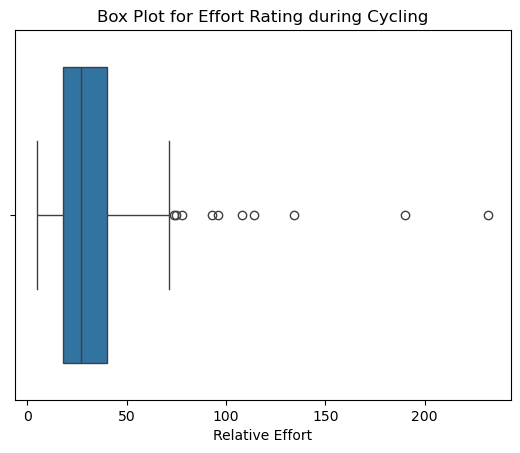

In [108]:
sns.boxplot(x = df_effort, data = df)
plt.title("Box Plot for Effort Rating during Cycling")

Text(0.5, 1.0, 'Box Plot for Maximum Speed Reached during Cycling')

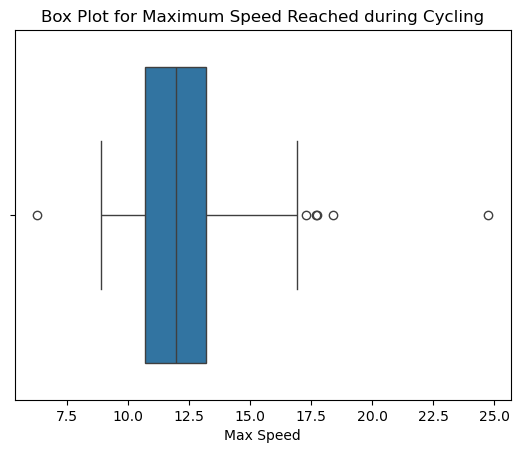

In [109]:
sns.boxplot(x = df_max_speed, data = df)
plt.title("Box Plot for Maximum Speed Reached during Cycling")

Text(0.5, 1.0, 'Box Plot for Average Speed Recorded during Cycling')

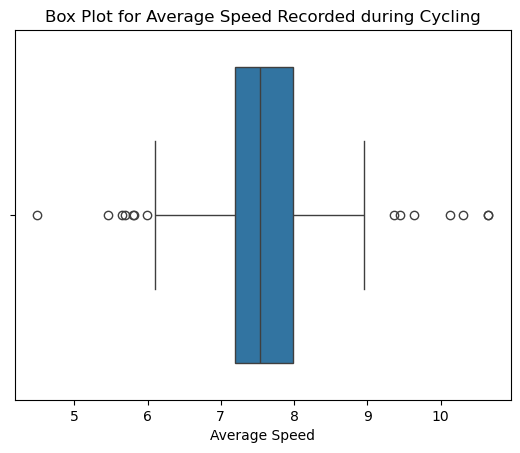

In [110]:
sns.boxplot(x = df_avg_speed, data = df)
plt.title("Box Plot for Average Speed Recorded during Cycling")

Text(0.5, 1.0, 'Box Plot for Functional Threshold Power calculated during Cycling')

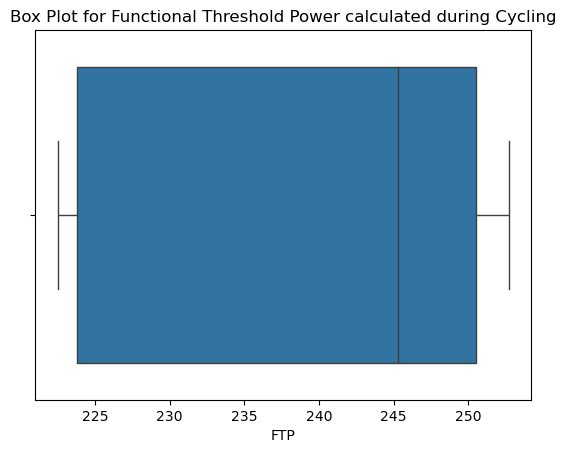

In [111]:
sns.boxplot(x = df_ftp, data = df)
plt.title("Box Plot for Functional Threshold Power calculated during Cycling")

Looking at the above results we can confirm a few things. Firstly, discussing the measure of 
spread for all of the isolated datasets, elapsed time, distance, max heart rate, effort and 
max speed all were positively skewed, or sometimes known as left skewed datasets. When we think
about this logically it makes sense. Think about it in sense of Basketball. If you gather 100
random people and ask them to shoot 100 shots at a basket, there's not going to be many that make
a lot due to varying reasons, but as you gradually get tired you'll miss more and more and the
average should be relatively similar. There might be some actual players amongst this that bring 
the average up but you would assume there wouldn't be enough to skew the average significantly. 
Now imagine we put Steph Curry in that group. The greatest shooter of a basketball of all time.
He's going to make more than 90% of his shots based on his statistical history, and now there's
something pulling the average up. Now in relation to this dataset, there are going to be some
cyclists that are stronger than others. There are going to be more powerful athletes that can 
reach higher top speeds, there's going to be athletes who are stronger enduranced than your regular
cyclist and therefore we're going to have what we call outliers that skew the average. Where the 
dataset doesn't skew is in average speed and FTP. This is particularly interesting since we might 
assume average speed wouldn't be an unimodal spread but given the range of the data is small we get
a more condensed spread. This is the same as FTP. We can observe and identify from the data summary
and the box plot that the score produced from the calculation is within a range of approximately 
225 to 250, meaning it's near on impossible for the FTP dataset to produce any outliers. 

# Correlation

The next part we will migrate into is Correlation. Correlation is the statistical measurement of
relationship between two variables. If the value of the correlation between two variables is 1
or close to 1, we say it has a strong positive correlation and can reliably determine that variable
has direct dependence on the variable. If the correlation value is -1 or close to -1, we determine 
the relationship between the two variables is weak negative correlation and that the variables have
little to no relationship and/or dependence on one another. 

In [112]:
# import key packages for correlation
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # for Linear Regression
from sklearn.metrics import mean_squared_error # To calc MSE and RMSE
from sklearn.metrics import r2_score # To calc to R^2 score
from sklearn.metrics import mean_absolute_error # To calc the MAE

In [113]:
# given activity date is a useless data entry we'll drop it for the purpose of this exercise
# date has no relation to heart rate, calories, etc. 
df_dateless = df.drop(columns = ['Activity Date'])

In [116]:
# create a correlation matrix to show a table of relationship values
correlation_matrix = df_dateless.corr()

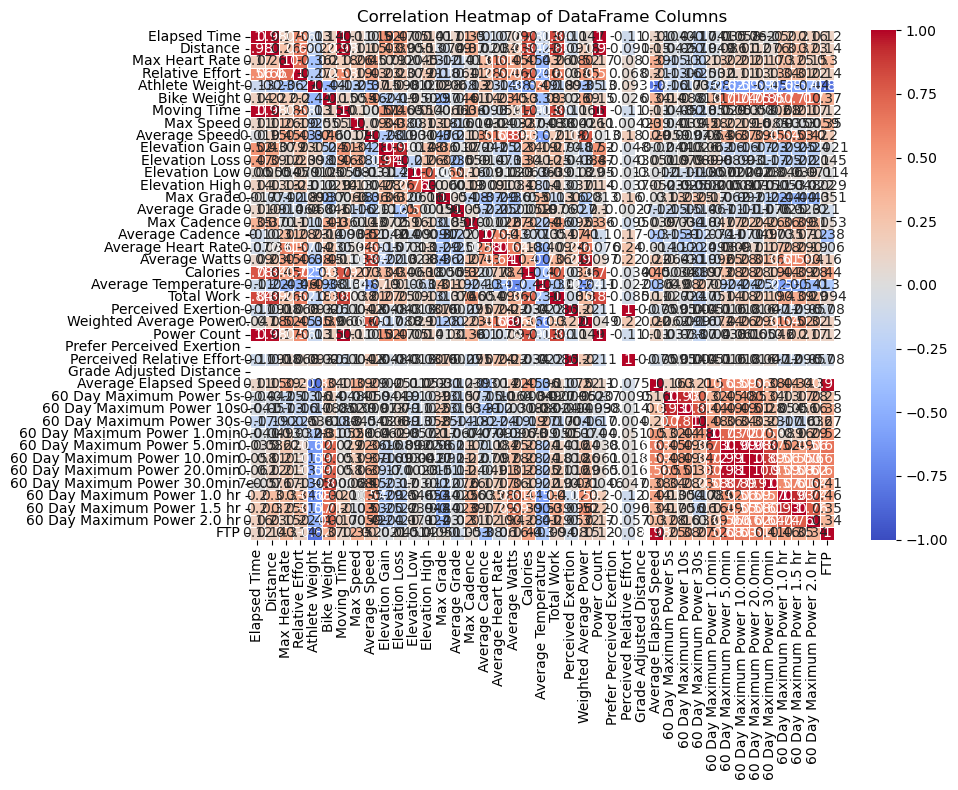

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.tight_layout()
plt.show()

Looking at this correlation matrix it is incredibly messy. From afar, we can observe a heatmap 
of red (values closer to 1) in the bottom right corner and significantly more blue (closer to -1)
in the bottom left. If we want to see the relationships more clearly, we can use techniques to
seperate the matrix by select values at a time. Given our initial observance, we might be better off 
splitting the matrix into halves or thirds to try and get the most appropriate statistical summary
possible. 

In [117]:
# define a function to segment the matrix 
def create_correlation_segments(df_name, max_cols_per_segment = 10):
    # Get all numeric columns (correlation only works on numeric data)
    numeric_cols = df_name.select_dtypes(include = [np.number]).columns.tolist()
    total_cols = len(numeric_cols)
    
    # Calculate how many segments we need
    num_segments = math.ceil(total_cols / max_cols_per_segment)
    
    # Create segments
    for i in range(num_segments):
        start_idx = i * max_cols_per_segment
        end_idx = min((i + 1) * max_cols_per_segment, total_cols)
        
        segment_cols = numeric_cols[start_idx:end_idx]
        segment_df = df_name[segment_cols]
        
        # Calculate correlation for this segment
        corr_matrix = segment_df.corr()
        
        # Create figure and plot
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, 
                   annot = True,
                   cmap = 'coolwarm',
                   linewidths = 0.5,
                   vmin = -1, vmax = 1,
                   annot_kws = {"size": 8})  # Smaller font size for annotations
        
        plt.title(f'Correlation Heatmap - Segment {i+1} (Columns {start_idx+1}-{end_idx})')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

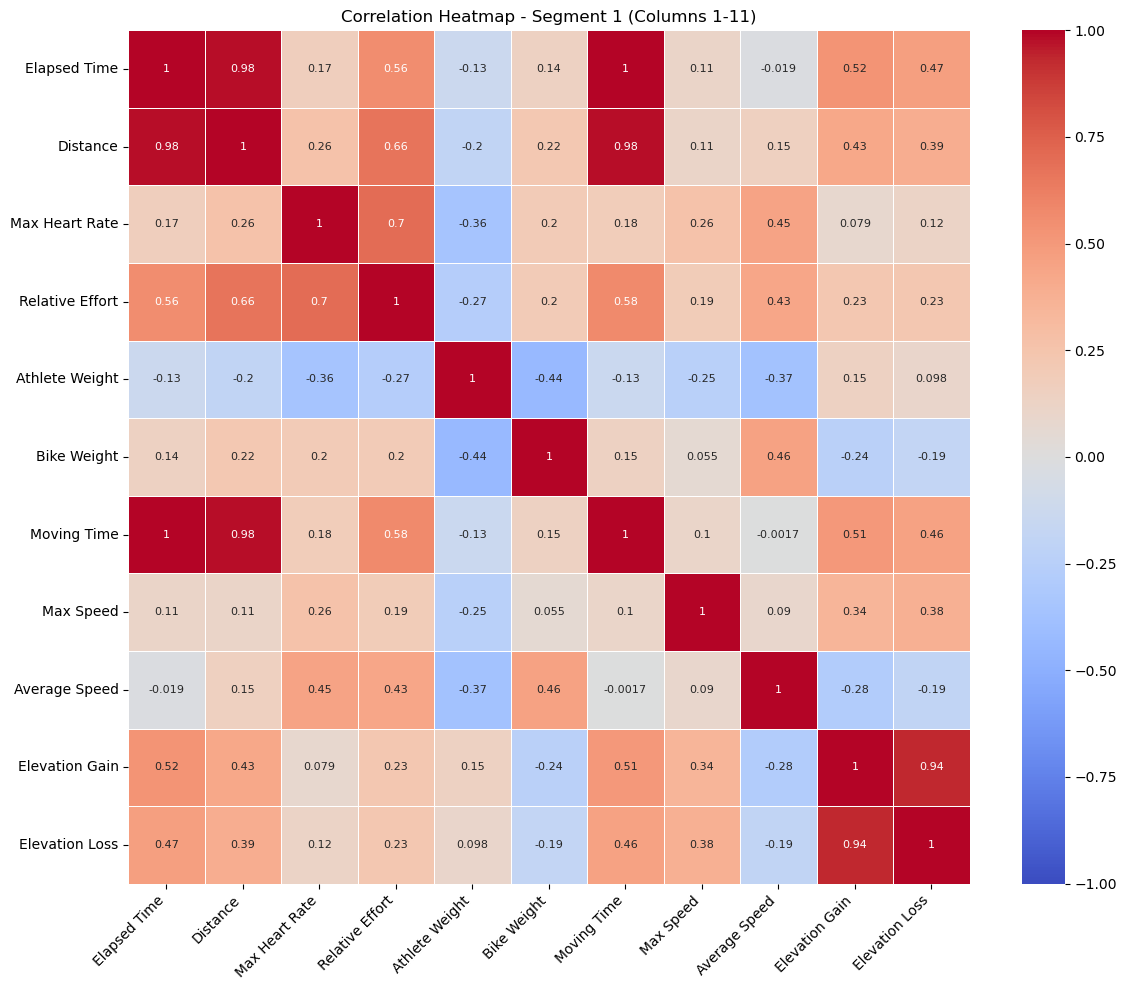

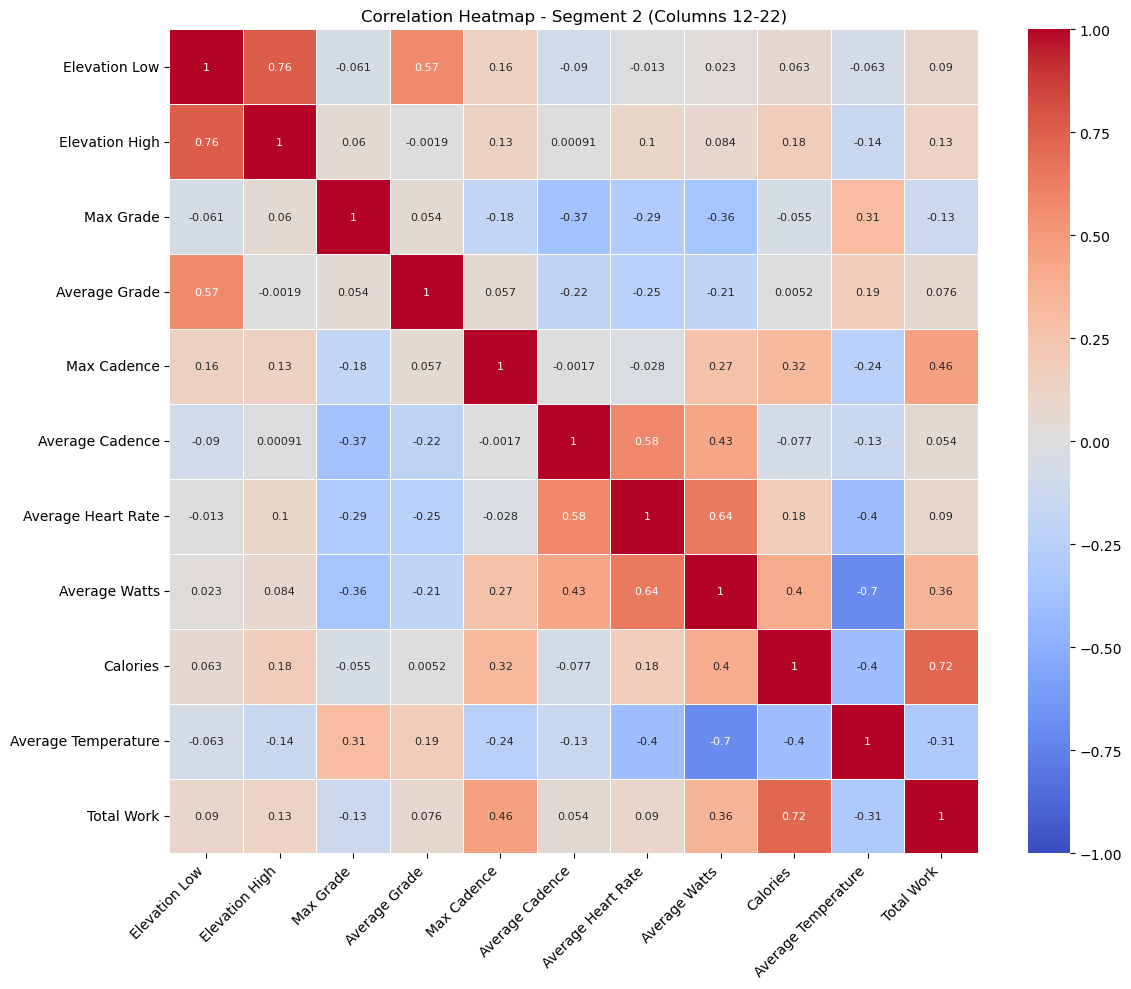

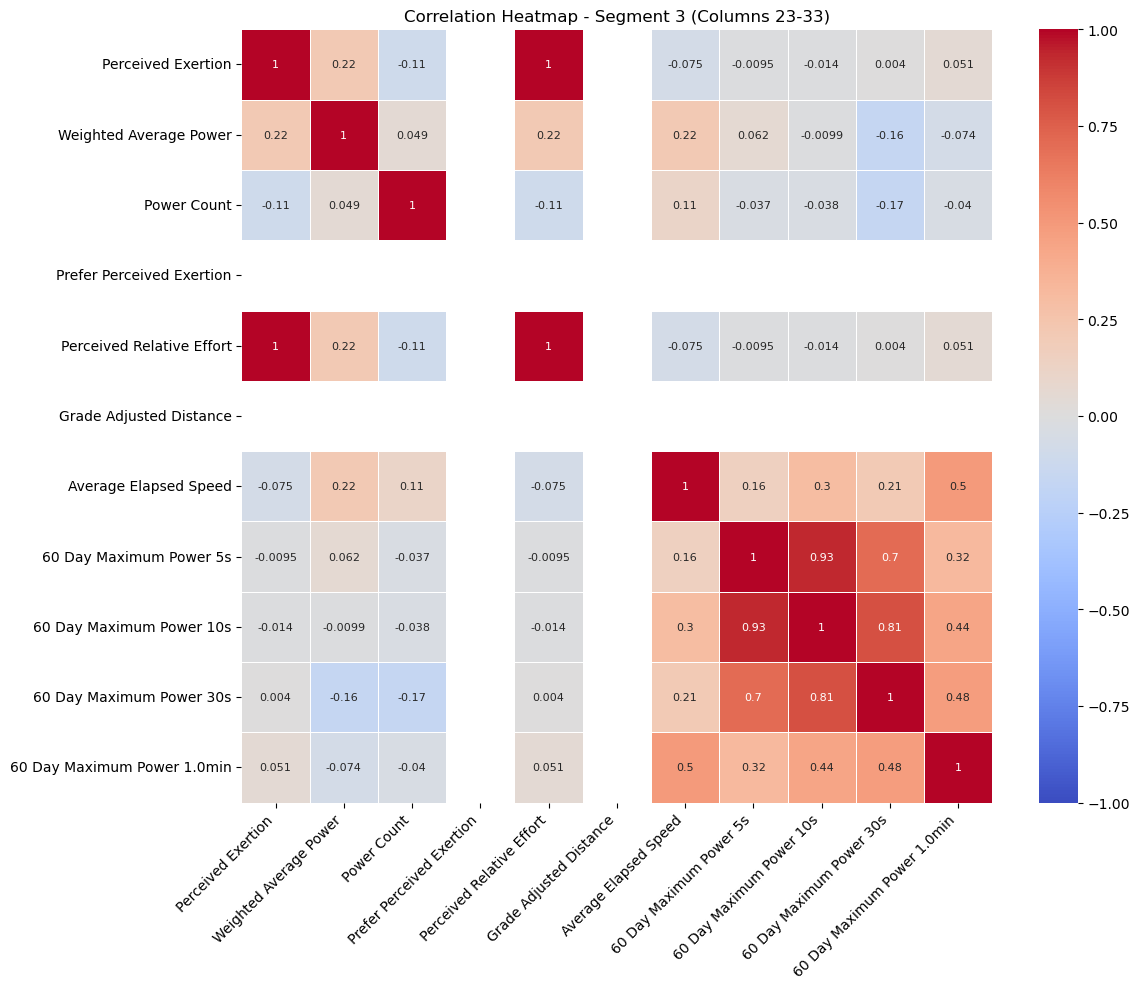

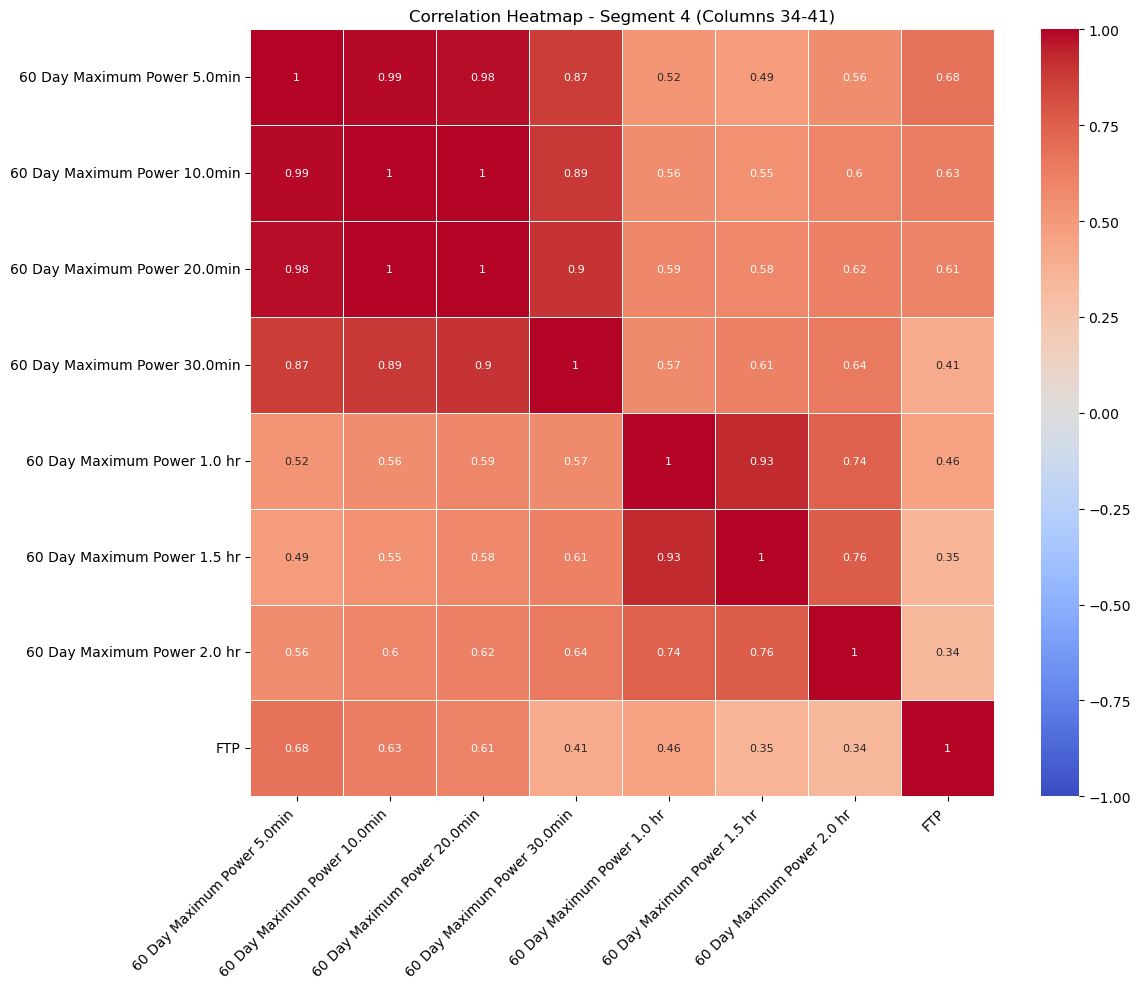

In [119]:
# since we know there's about 41 columns, lets split into 11 segments so we get close to 4 even segments
create_correlation_segments(df_dateless, max_cols_per_segment = 11)

After splitting this up we can see it's rather large and can be made smaller again, but firstly, there
are some empty columns and rows within the matrix. This means we can update our dataset to drop these
columns in the dataset so we're not wasting space. Going over the correlation above, we can drop 
Grade Adjusted Distance and Prefer Perceived Exertion as they're irrelevant to what we're trying to
discover. 

In [120]:
df_updated = df.drop(columns = ['Activity Date', 'Grade Adjusted Distance', 'Prefer Perceived Exertion'])

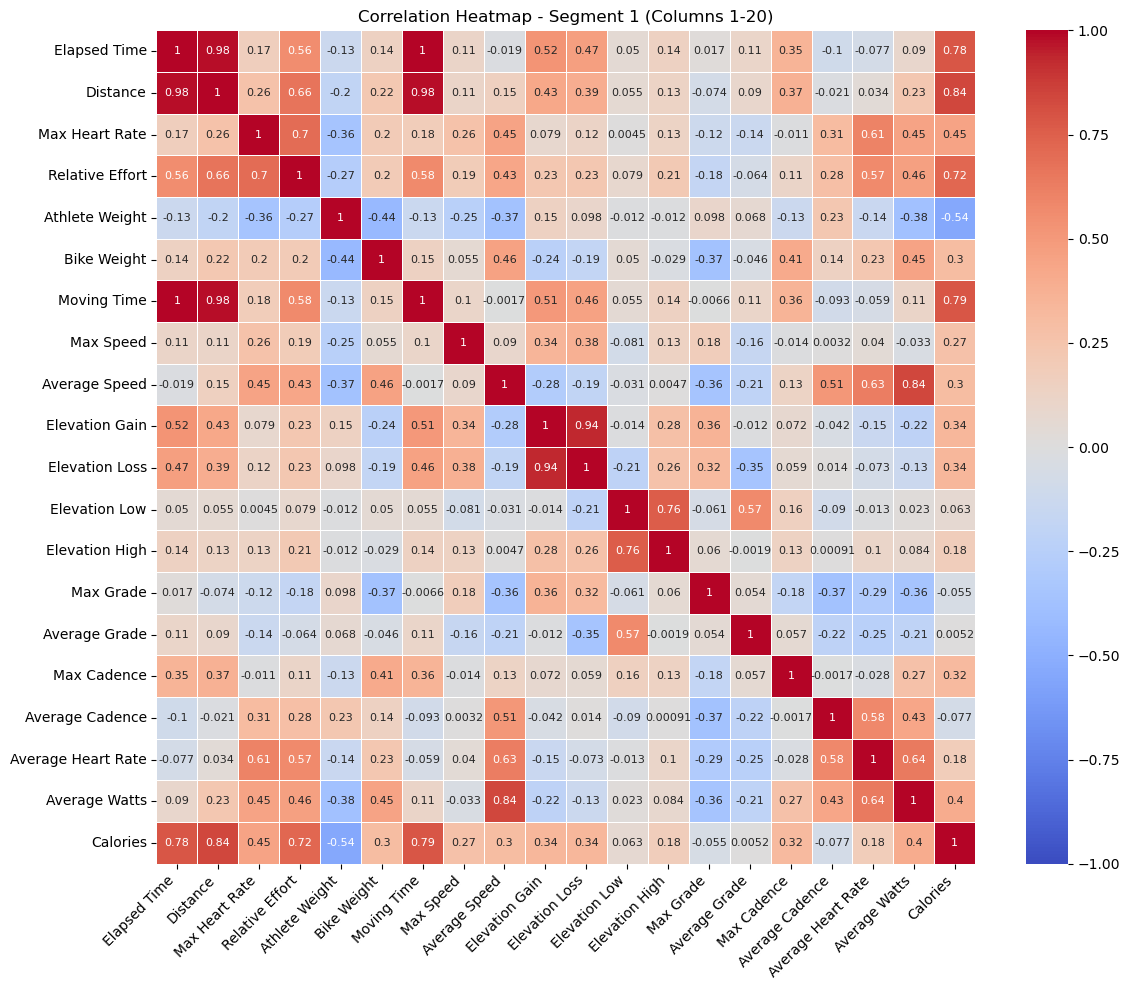

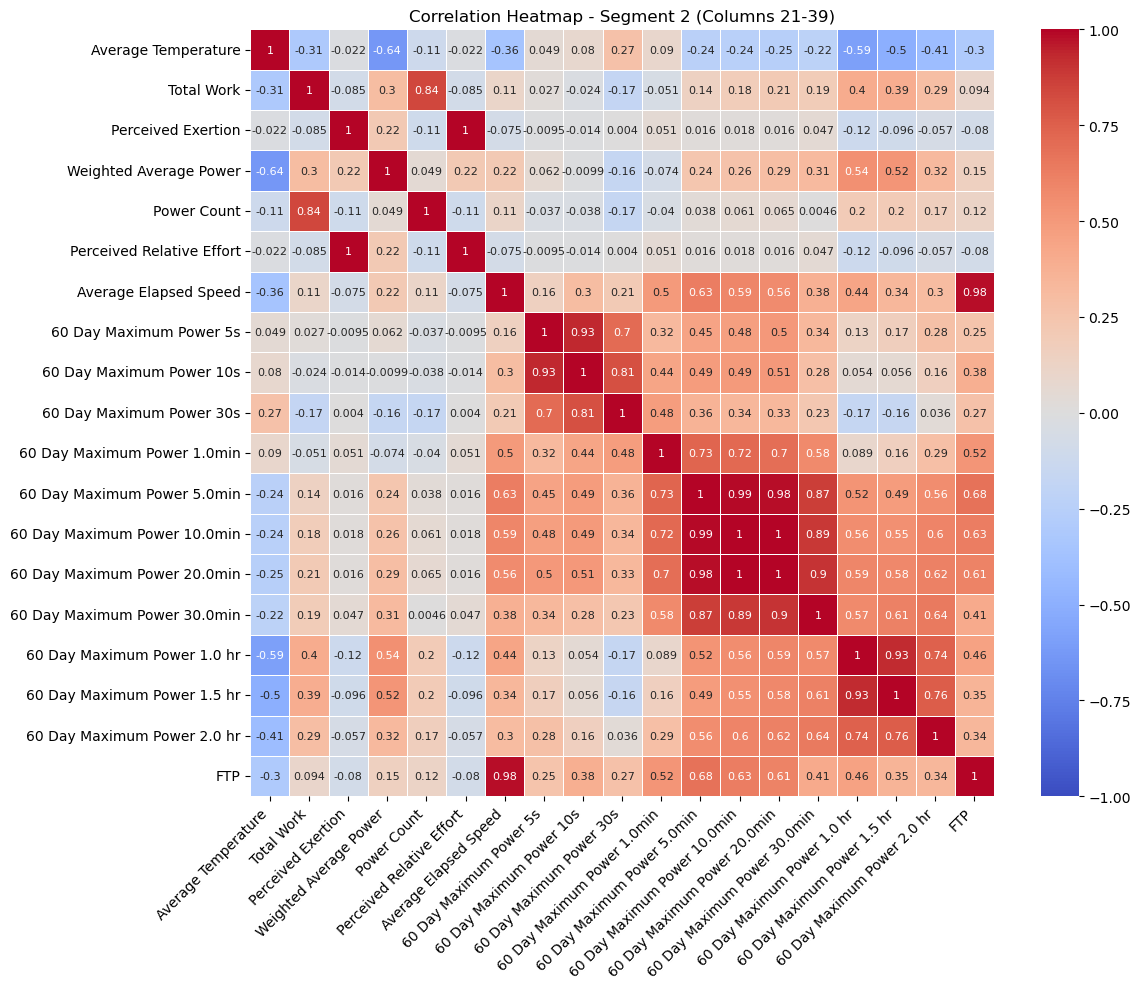

In [121]:
create_correlation_segments(df_updated, max_cols_per_segment = 20)

Now we have a more neat and tidy correlation matrix we can properly observe key relationships. The
first thing to note is that the diagonals are all equal to 1. This is because a variable will always
have a perfect relationship with itself since it is entirely dependent on itself. Analysing the 
matrices, we can see some key relationships. Touching on a few, distance and elapsed time have an
approximate 0.98 strength in relationsip, which in theory makes sense since the longer the distance
you travel the more likely the longer the bike ride will be. We can also see that distance and calories
have a correlation of 0.84. This is particularly a point of interest as even though it makes sense that
the greater distance you travel, the more calories you burn, but it solidifies this assumption with a 
strong, positive relationsip meaning it's a great metric for a potential predictor. 

In [122]:
# isolate our two columns of interest 
distance_covered = df[['Distance']]
calories_burned = df['Calories']

In [124]:
# train Linear Regression 
model = LinearRegression()
model.fit(distance_covered, calories_burned)

LinearRegression()

Above we have a simple trained linear regression model. Linear regression is one of the more
simpler models we have in machine learning. It takes an explanatory variable and estimates the
relationship between a dependent variable. For the purpose of this exercise, we take distance 
and calories and build a linear regression model to predict the amount of calories burned 
dependent on the amount of distance travelled on a bike trip. As identified above, we know
theres a strong relationship between these two variables and therefore we should be provided with
a strong output. We'll plug in variables of 25, 50 and 100 in distance covered to predict the 
amount of calories burned on the basis of those rides occuring. 

In [125]:
predicted_burn_1 = np.round(model.predict([[25]]), 2)
print("The predicted Calories burned running 25km is: ", predicted_burn_1)

predicted_burn_2 = np.round(model.predict([[50]]), 2)
print("The predicted Calories burned running 50km is: ", predicted_burn_2)

predicted_burn_3 = np.round(model.predict([[100]]), 2)
print("The predicted Calories burned running 100km is: ", predicted_burn_3)

The predicted Calories burned running 25km is:  [282.37]
The predicted Calories burned running 50km is:  [805.16]
The predicted Calories burned running 100km is:  [1850.74]


C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can take this a step further, using multiple variables to determine the response variable.
Sticking with the theme of predicting calories burned and looking back at the correlation matrix, 
we'll look at some relationships that have a positive correlation with calories and use them
to predict. We'll stick with distance, and we'll use the following columns:
- Relative Effort (0.72 Correlation Score)
- Moving Time (0.79 Correlation Score)
- Average Heart Rate (Only 0.18 Correlation Score but we wan't to add this since it has health ramifications and AvHR has strong correlation to effort and distance)

In [126]:
x_labels = df[['Distance', 'Relative Effort','Moving Time', 'Average Heart Rate']]
cal_burned = df['Calories']

x_train, x_test, cal_train, cal_test = train_test_split(x_labels, cal_burned, test_size = 0.2)

In [127]:
model.fit(x_train, cal_train)

# Now we need to predict the test set
calorie_pred = model.predict(x_test)

In [128]:
# Evaluate the results of the model
MAE = np.round(mean_absolute_error(cal_test, calorie_pred), 3)
RMSE = np.round(np.sqrt(mean_squared_error(cal_test, calorie_pred)), 3)
R_squared = np.round(r2_score(cal_test, calorie_pred), 3)

# Print the results accordingly 
print("Mean Absolute Error (MAE): ", MAE)
print("Root Mean Squared Error (RMSE): ", RMSE)
print("R-squared (R^2): ", R_squared)

Mean Absolute Error (MAE):  252.244
Root Mean Squared Error (RMSE):  335.356
R-squared (R^2):  0.839


An important factor of building predictive models is assessing their performance through
scores. The first score is the Mean Absolute Error score, which is used to measure errors 
within the data. A higher score indictaes a slightly high difference between predicted 
values and actual values. We could somewhat anticipate this due to their being some outliers
when we visualised the data. The Mean Square Error is a similar metric and provides us with
information regarding predicted and actual variables. Given the fact it's slightly too high
for our liking we won't persist with the linear regression model. We do note however that the 
R squared value is a correlation value and indictaes the strength in the relationship. We 
identified above that the variables calories and distance had a near identical correlation, 
so it was a positive indication that adding more factors in predicting calories didn't 
weaken the relationship/correlation. 

# Further Modelling

Something I had previously worked on was predicting Sleep Efficiency through various factors. 
Initially I only just identified relationships and correlation, summarised key statistics and
build a basic linear regression model. I added to it later on by implementing some more complex
machine learning models, that being random forest and gradient boosting. In the next portion
I will be replicating this to attempt to identify a stronger model. After comparing these two 
models via statistics like we used above, we'll identify the strongest one and attempt to tune
it. To tune a model is to adjust certain parameters to effectively produce a stronger output. 
Upon further testing we'll input some random data and even input some data taken from the 
dataset to compare results. 

In [129]:
# Start with Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [130]:
# We'll use the 'factors' or influences of calories burned as our x set
factors = ['Elapsed Time', 'Distance', 'Relative Effort','Moving Time', 'Average Heart Rate']

# we're trying to predict y from x
x_factors = df[factors]
y_calories = df['Calories']

# Creating training and test sets for each combination of x_factors and calorie column (y_calories)
x_train_cal, x_test_cal, y_train_cal, y_test_cal = train_test_split(x_factors, y_calories, test_size = 0.4, random_state = 42)

# create 2 random forests  
rf_calories = RandomForestRegressor(random_state = 42)

rf_calories.fit(x_train_cal, y_train_cal)

RandomForestRegressor(random_state=42)

In [131]:
# Create a Dataframe Prediction using: Elapsed Time = 6000, Distance = 30, Relative Effort = 15, Moving Time = 5000, AHR = 115
rf_prediction = pd.DataFrame([[6000, 30, 15, 5000, 115]], columns = ['Elapsed Time', 'Distance', 'Relative Effort','Moving Time', 'Average Heart Rate'])

# Predict total no. of calories burned
predicted_burn = np.round(rf_calories.predict(rf_prediction), 2)

print("Predicted Calories burned for a ride 6000 seconds long, 30km covered, a relative effort rating of 15, total moving time of 5000 (seconds) and a average heart rate of 115 is : ", predicted_burn)

Predicted Calories burned for a ride 6000 seconds long, 30km covered, a relative effort rating of 15, total moving time of 5000 (seconds) and a average heart rate of 115 is :  [400.1]


In [132]:
# Predict on test sets
pred_rf_cal = rf_calories.predict(x_test_cal)

# Evaluate the results of the model
MAE_rf = np.round(mean_absolute_error(y_test_cal, pred_rf_cal), 3)
RMSE_rf = np.round(np.sqrt(mean_squared_error(y_test_cal, pred_rf_cal)), 3)
R_squared_rf = np.round(r2_score(y_test_cal, pred_rf_cal), 3)

print("For Calories Burned: ")
print("Mean Absolute Error (MAE): ", MAE_rf)
print("Root Mean Squared Error (RMSE): ", RMSE_rf)
print("R-squared (R^2): ", R_squared_rf)

For Calories Burned: 
Mean Absolute Error (MAE):  234.648
Root Mean Squared Error (RMSE):  333.775
R-squared (R^2):  0.781


Analysing the results from this model, we don't see a significant difference in our MAE and RMSE scores
which isn't necessarily suprising given we know the set has outliers. Comparing the R squared score 
however see's a negative difference. We can confirm that a Random Forest Model only has roughly 78.1% 
accuracy in it's predictions which is a downgrade on the linear regression model of 83.9%.

In [42]:
# import the GB regressor for model
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
# Build XGBoost model (Gradient Boosting)
gb_efficiency = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [44]:
gb_efficiency.fit(x_train_cal, y_train_cal)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [45]:
pred_gb = gb_efficiency.predict(x_test_cal)

In [46]:
# Evaluate the results of the model
MAE_gb = np.round(mean_absolute_error(y_test_cal, pred_gb), 3)
RMSE_gb = np.round(np.sqrt(mean_squared_error(y_test_cal, pred_gb)), 3)
R_squared_gb = np.round(r2_score(y_test_cal, pred_gb), 3)

In [47]:
print("For Gradient Boosting Model on Sleep Efficiency: ")
print("Mean Absolute Error (MAE): ", MAE_gb)
print("Root Mean Squared Error (RMSE): ", RMSE_gb)
print("R-squared (R^2): ", R_squared_gb)

For Gradient Boosting Model on Sleep Efficiency: 
Mean Absolute Error (MAE):  241.007
Root Mean Squared Error (RMSE):  361.626
R-squared (R^2):  0.743


Analysing the results above and comparing them to the Random Forest results, we see there's
once again a downgrade in models, producing an approximate accuracy rating on 74.3%. This is
enough of a downgrade to assume Gradient Boosting is not the ideal model to use for predicting
data in the set and therefore we'll progress without it.

# Tuning

In [133]:
# import both randomizedsearch and labelencoder for tuning purposes
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [137]:
# Read the dataset as a dataframe again so we don't have to scroll up
new_df = pd.read_csv("extended_activities_with_ftp.csv")

In [138]:
# We'll drop the irrelevant column of 'Activity Date' as it serves no purpose to us, only for data recording purposes
new_df.drop(columns = ['Activity Date'], inplace = True)

In [139]:
# encode labels like 'male' or 'female' to binary values so our data is uniform as integers 
# strings can't be analysed and broken down like integers can
label_encoders = {}
for col in new_df.select_dtypes(include=['object']).columns:
    new_df[col] = LabelEncoder().fit_transform(new_df[col])
    label_encoders[col] = LabelEncoder()

In [142]:
# make x = Cycling dataset (all columns) except the 'Calories' column
df_columns = new_df.drop(columns = ['Calories'])

# make y = 'Calories' for audit purposes 
calories = new_df['Calories']

In [143]:
# Perform our training and testing split of the default of 80%/20%
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(df_columns, calories, test_size = 0.2, random_state = 42)

In [144]:
# define our range of hyperparamters for tuning the RF model
# we're tuning the max. no. of trees, branchesmin. no. of leaves, etc.
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.7]
}

In [145]:
# Create our new RF model
new_rf = RandomForestRegressor(random_state = 42)

In [146]:
# define our paramters for our random_search method we're using to enhance the RF model
random_search = RandomizedSearchCV(
    estimator = new_rf,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 3,
    scoring = 'r2',
    random_state = 42,
    n_jobs = -1
)

In [147]:
# Using our random_search alg to fit the new model
random_search.fit(new_x_train, new_y_train)

C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt', 0.7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [148]:
# Using the best_estimator built in function to define our new best estimator RF model for use
new_best_rf = random_search.best_estimator_

In [149]:
new_y_pred = new_best_rf.predict(new_x_test)

In [150]:
new_rf_mae = np.round(mean_absolute_error(new_y_test, new_y_pred), 3)
new_rf_rmse = np.round(np.sqrt(mean_squared_error(new_y_test, new_y_pred)), 3)
new_rf_r2 = np.round(r2_score(new_y_test, new_y_pred), 3)

In [166]:
print("New Random Forest Model with Random Search for predicting Calories: ")
print("Mean Absolute Error (MAE): ", new_rf_mae)
print("Root Mean Squared Error (RMSE): ", new_rf_rmse)
print("R-squared (R^2): ", new_rf_r2)

New Random Forest Model with Random Search for predicting Calories: 
Mean Absolute Error (MAE):  98.121
Root Mean Squared Error (RMSE):  142.109
R-squared (R^2):  0.949


After fine tuning we see an incredible improvement in the Random Forest model.
Both the MAE and RMSE scores decreased significantly, meaning there's significant
improvement in the actual and predicted values. Finally, we can observe the R squared 
score being equal to 94.9% accuracy, which is by far the strongest R squared score 
and ism considered a very strong positive correlation.

# Working in FTP

Since this dataset was the cycling dataset with FTP, we'll analyse FTP as
a metric and potentially build some models around predicting it's score. FTP is
the Functional Threshold Power and it is the maximum amount of watts an individual
can sustain within an hour of exercise. This is certainly a metric worth analysing 
as it can be the difference between high performance and peak performance. A 
competitive athlete needs to know their limits since they can be trained and refined.
Knowing the amount of power you can exert for a period of time is incredibly useful
as a competitor. Think of it this way, if you can calculate your own then you can 
calculate your competitions threshold. Now we might not know all of the statistics 
for our competitor, i.e., heart rate, weight, etc., but if we can isolate some other
key metrics such as max speed and distance then there's no reason why we can predict 
this potentially giving our athletes the edge in a competitive environment. 

In [152]:
# first let's identify the relationship variables for FTP
upd_corr_matrix = df_updated.corr()
ftp_correlations = upd_corr_matrix['FTP'].sort_values(ascending = False)

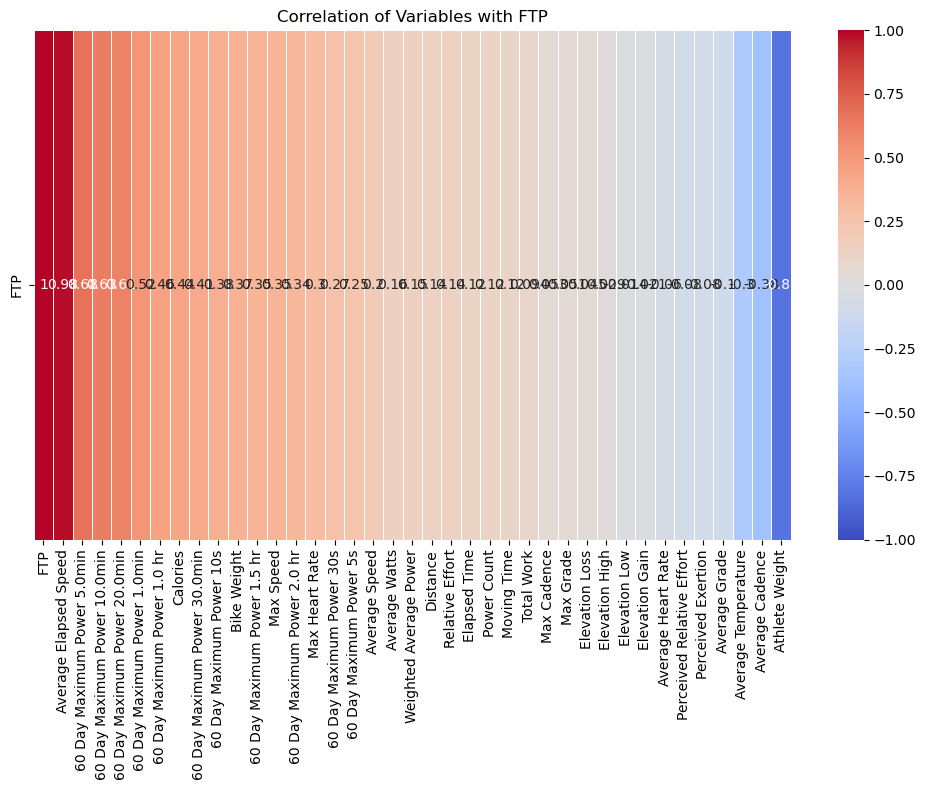

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    pd.DataFrame(ftp_correlations).T,  # Transpose to get FTP as column
    annot = True,                        # Show correlation values
    cmap = 'coolwarm',                   # Color map (red for negative, blue for positive)
    vmin = -1, vmax = 1,                   # Set limits for correlation values
    linewidths = 0.5                     # Add lines between cells
)
plt.title('Correlation of Variables with FTP')
plt.tight_layout()
plt.show()

Quickly running our eye over the above statsitics, we can identify 
the strongest relationships of our x variable, FTP. Elapsed speed 
has the strongest correlation outside of itself and the 60 day 
maximum power ratings over intervals all have signifcant positive
relationships with them. We can also identify positive, strong 
relationships with calories and max speed, and max heart rate also
is one of the non-60 day max stats that shows a positive relationship.
We'll isolate these variables and see if we can use them to effectively 
calculate and predict FTP. 

In [154]:
# We'll use the 'factors' or influences of sleep as our x set
ftp_factors = ['Average Elapsed Speed', 'Calories', 'Max Heart Rate','Max Speed', 
               '60 Day Maximum Power 5.0min', '60 Day Maximum Power 10.0min']

# we're trying to predict y from x
ftp_factors = df[ftp_factors]
y_ftp = df['FTP']

# Creating training and test sets for each combination of x_factors and sleep_columns
x_train_ftp, x_test_ftp, y_train_ftp, y_test_ftp = train_test_split(ftp_factors, y_ftp, test_size = 0.4, random_state = 42)

In [155]:
# create random forest  
rf_ftp = RandomForestRegressor(random_state = 42)

rf_ftp.fit(x_train_ftp, y_train_ftp)

RandomForestRegressor(random_state=42)

In [156]:
import random

In [157]:
random_index = random.randint(0, len(df) - 1)  # Choose a random index
random_sample = df.iloc[[random_index]]  # Double brackets to keep it as DataFrame

In [160]:
# Extract just the features (not the target)
random_features = random_sample[['Average Elapsed Speed', 'Calories', 'Max Heart Rate',
                                 'Max Speed', '60 Day Maximum Power 5.0min', 
                                 '60 Day Maximum Power 10.0min']].copy()

In [165]:
# Make prediction on this random sample
predicted_value = np.round(rf_ftp.predict(random_features), 2)

# Get the actual value for comparison
actual_value = random_sample['FTP'].values[0]  # Assuming 'FTP' is your target column

# Compare prediction vs actual
print("Random sample index: ", random_index)
print("Features: ", random_features.values[0])
print("Predicted FTP: ", predicted_value[0])
print("Actual FTP: ", actual_value)
print("Difference: ", np.round(abs(predicted_value[0] - actual_value), 3))

Random sample index:  79
Features:  [   0.         1103.          142.           11.39999962  235.6
  231.9       ]
Predicted FTP:  224.92
Actual FTP:  224.9
Difference:  0.02


We can see from this Random Forest model that we have a strong relationship since 
the actual and predicted value are very similar. We can obviously use different 
kinds of data and of course can test the data more and more but this model appears
to be an incredible predictor for FTP. 

In [168]:
# Predict on test sets
pred_rf_ftp = rf_ftp.predict(x_test_ftp)

ftp_rf_mae = np.round(mean_absolute_error(y_test_ftp, pred_rf_ftp), 3)
ftp_rf_rmse = np.round(np.sqrt(mean_squared_error(y_test_ftp, pred_rf_ftp)), 3)
ftp_rf_r2 = np.round(r2_score(y_test_ftp, pred_rf_ftp), 3)

print("Random Forest Model for predicting FTP: ")
print("Mean Absolute Error (MAE): ", ftp_rf_mae)
print("Root Mean Squared Error (RMSE): ", ftp_rf_rmse)
print("R-squared (R^2): ", ftp_rf_r2)

Random Forest Model for predicting FTP: 
Mean Absolute Error (MAE):  0.306
Root Mean Squared Error (RMSE):  0.491
R-squared (R^2):  0.999


In [169]:
# Low Error Rate
# Near Perfect Accuracy